In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import pdb
import glob
import salem
from utils import constants as cnst
from wavelet import util, wav
from scipy.ndimage.measurements import label
from scipy import ndimage
from utils import u_arrays as ua, u_grid
from wavelet import util
import numpy.ma as ma
import pickle as pkl
from eod import mfg
from utils import u_grid, u_interpolate as u_int
from kpywavelet import wavelet as wvt
import pywt
from utils import u_plot as uplot

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [122]:
data = xr.open_dataarray('/home/ck/DIR/cornkle/data/VERA/lsta_trend_chris/mean_lst_trend.nc')

In [123]:
data

<xarray.DataArray (lat: 320, lon: 760)>
[243200 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 4.025 4.075 4.125 4.175 ... 19.87 19.92 19.97 20.02
  * lon      (lon) float64 -17.98 -17.92 -17.87 -17.82 ... 19.92 19.97 20.02

In [124]:
data.lon

<xarray.DataArray 'lon' (lon: 760)>
array([-17.975   , -17.924934, -17.874868, ...,  19.924868,  19.974934,
        20.025   ])
Coordinates:
  * lon      (lon) float64 -17.98 -17.92 -17.87 -17.82 ... 19.92 19.97 20.02

In [125]:
#data = data.sel(lat=slice(4,11), lon=slice(-15,10))

(array([1.00000e+01, 3.10000e+01, 2.58000e+02, 2.27200e+03, 2.62930e+04,
        1.21118e+05, 5.33900e+04, 8.43200e+03, 7.02000e+02, 4.40000e+01]),
 array([-0.44077477, -0.3635444 , -0.28631407, -0.2090837 , -0.13185336,
        -0.05462301,  0.02260735,  0.0998377 ,  0.17706805,  0.2542984 ,
         0.33152875], dtype=float32),
 <a list of 10 Patch objects>)

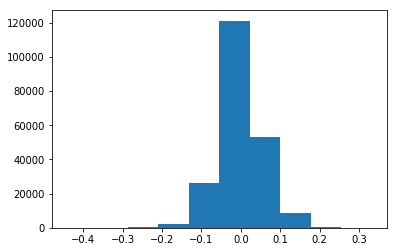

In [126]:
plt.hist(data.values.flat[data.values.flat>-999])

In [127]:
mask = data.values > -998

In [128]:
mask.shape

(320, 760)

In [129]:
data.values[data.values<=-998]=0.01

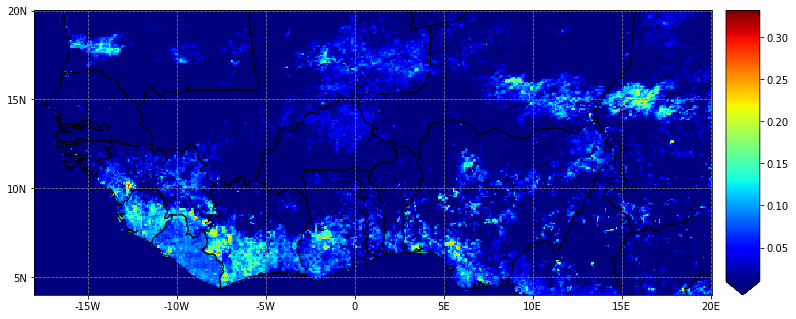

In [130]:
plt.figure(figsize=(13,9))
data.salem.quick_map(cmap='jet', vmin=0.01)

In [131]:
data.shape

(320, 760)

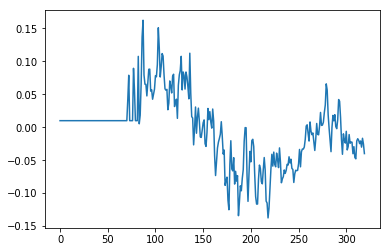

In [132]:
plt.plot(data.values[:,100])

In [133]:
data = data.values
data[data<0] = 0
data = (data - np.mean(data))# / np.std(data)

In [230]:
data = np.arange(150)*0
data[20:60] = 5
data[35:45] = 8

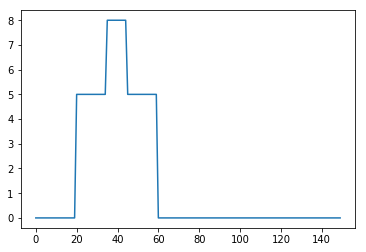

In [231]:
plt.plot(data)

In [232]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [284]:
w = pywt.ContinuousWavelet('fbsp')
phi, psi = w.wavefun()

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  """Entry point for launching an IPython kernel.


In [285]:
print(w)

ContinuousWavelet fbsp
  Family name:    Frequency B-Spline wavelets
  Short name:     fbsp
  Symmetry:       asymmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


/home/ck/miniconda3/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


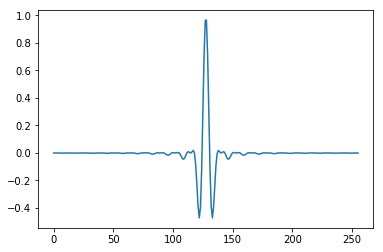

In [272]:
plt.plot(phi)

In [293]:
scales = np.arange(1, 61)
coeffs, freq = pywt.cwt(data,scales, w)

In [294]:
freq

array([0.5       , 0.25      , 0.16666667, 0.125     , 0.1       ,
       0.08333333, 0.07142857, 0.0625    , 0.05555556, 0.05      ,
       0.04545455, 0.04166667, 0.03846154, 0.03571429, 0.03333333,
       0.03125   , 0.02941176, 0.02777778, 0.02631579, 0.025     ,
       0.02380952, 0.02272727, 0.02173913, 0.02083333, 0.02      ,
       0.01923077, 0.01851852, 0.01785714, 0.01724138, 0.01666667,
       0.01612903, 0.015625  , 0.01515152, 0.01470588, 0.01428571,
       0.01388889, 0.01351351, 0.01315789, 0.01282051, 0.0125    ,
       0.01219512, 0.01190476, 0.01162791, 0.01136364, 0.01111111,
       0.01086957, 0.0106383 , 0.01041667, 0.01020408, 0.01      ,
       0.00980392, 0.00961538, 0.00943396, 0.00925926, 0.00909091,
       0.00892857, 0.00877193, 0.00862069, 0.00847458, 0.00833333])

In [295]:
len(coeffs)

60

In [296]:
for ll in range(len(coeffs)):
    (coeffs[ll])[coeffs[ll]<0]=0

/home/ck/miniconda3/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


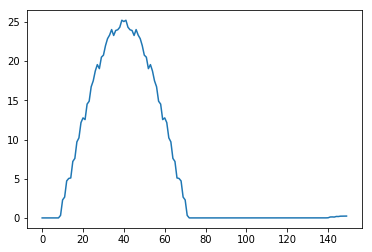

In [297]:
plt.plot(coeffs[-1])

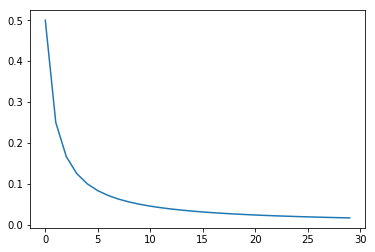

In [286]:
plt.plot(freq)

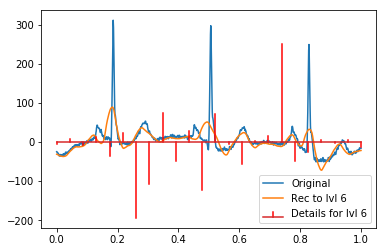

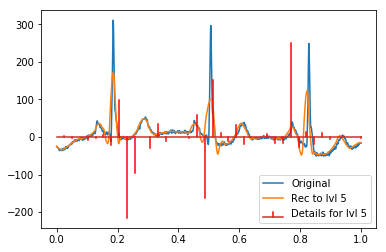

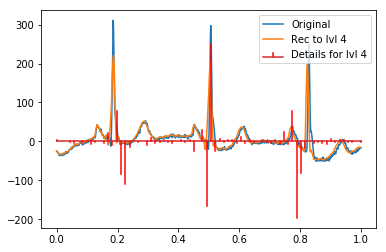

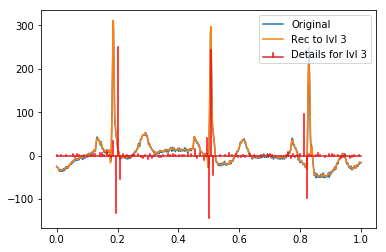

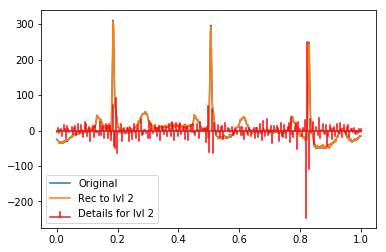

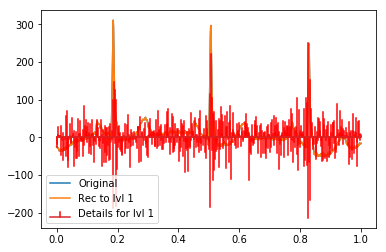

In [120]:

def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    #plt.figure()
    #plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)
    ym = np.median(yyy)
    plt.plot(np.linspace(0, 1., num=len(yyy)), yyy-ym, **kwargs)


def reconstruction_stem(yyy, xmax, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    ymax = yyy.max()
    plt.stem(np.linspace(0, 1., num=len(yyy)), yyy*(xmax/ymax), **kwargs)


x = pywt.data.ecg()
w = pywt.Wavelet('sym5')
nl = 6
coeffs = pywt.wavedec(x, w, level=nl)



'''
plt.figure()
plt.stem(coeffs[1]); plt.legend(['Lvl 6 detail coefficients'])
plt.figure()
plt.stem(coeffs[2]); plt.legend(['Lvl 5 detail coefficients'])
plt.figure()
plt.stem(coeffs[3]); plt.legend(['Lvl 4 detail coefficients'])
plt.figure()
plt.stem(coeffs[4]); plt.legend(['Lvl 3 detail coefficients'])
plt.figure()
plt.stem(coeffs[5]); plt.legend(['Lvl 2 detail coefficients'])
plt.figure()
plt.stem(coeffs[6]); plt.legend(['Lvl 1 detail coefficients'])
'''


xmax = x.max()
for i in range(nl):
    plt.figure()
    reconstruction_plot(x) # original signal 
    #reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
    reconstruction_plot(pywt.waverec(coeffs[:i+2] + [None] * (nl-i-1), w)) # partial reconstruction 
    reconstruction_stem(coeffs[i+1], xmax, markerfmt ='none', linefmt='r-')
    #plt.legend(['Original', 'Full reconstruction', ('Rec to lvl %d')%(nl-i), ('Details for lvl %d')%(nl-i)])
    plt.legend(['Original', ('Rec to lvl %d')%(nl-i), ('Details for lvl %d')%(nl-i)])